# L6. Constraint Propagation in solving CSPs - Asterisk_Sudoku

## CSPs OVERVIEW

CSPs are a special kind of search problems. Here we don't treat the space as a black box but the state has a particular form and we use that to our advantage to tweak our algorithms to be more suited to the problems.

A CSP State is defined by a set of variables which can take values from corresponding domains. These variables can take only certain values in their domains to satisfy the constraints.

A set of assignments which satisfies all constraints passes the goal test.

A **CSP is specified by** the following **inputs**:

* **variables** - A list of variables; each is atomic (e.g. int or string).
* **domains** - A dict of {var:[possible_value, ...]} entries.
* **neighbors** - A dict of {var:[var,...]} that for each variable lists the other variables that participate in constraints.
* **constraints** - A function f(A, a, B, b) that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b

Since "CSPs are a special kind of search problems" our `CSPBasic class` is a derived class from the `base Problem class`.

A `CSPBasic class` consists of all is CSP's inputs mentioned above.

The `__ _ init _ __` method parameters specify the CSP.

* `Variables` can be passed as a list of strings or integers.

* `Domains` are passed as dict where "key" specifies the variables and "value" specifies the domains.

The variables are passed as an empty list. Variables are extracted from the keys of the domain dictionary.

* `Neighbor` is a dict of variables that essentially describes the constraint graph. Here each variable key has a list of its values which are the variables that are constraint along with it.

* The `constraint parameter` should be a function *f(A, a, B, b)* that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b.

* We have additional parameters like `nassings` which is incremented each time an assignment is made when calling the `assign` method.

The `CSPBasic class` also supports data structures and methods that help you solve CSPs by calling a search function on the CSP.

In [25]:
from src.CSPclass import CSPBasic

In [26]:
help(CSPBasic.prune)

Help on function prune in module src.CSPclass:

prune(self, var, value)
    Rule out var=value.



In [27]:
help(CSPBasic.__init__)

Help on function __init__ in module src.CSPclass:

__init__(self, variables, domains, neighbors, constraints)
    Construct a CSP problem. If variables is empty, it becomes domains.keys().



Also we need to create the `CSP class` derived from `CSPBAsic`

In [1]:
from src.CSPclass import CSP

In [2]:
help(CSP.assign)

Help on function assign in module src.CSPclass:

assign(self, var, val, assignment)
    Add {var: val} to assignment; Discard the old value if any.



In [3]:
help(CSP.unassign)

Help on function unassign in module src.CSPclass:

unassign(self, var, assignment)
    Remove {var: val} from assignment.
    DO NOT call this if you are changing a variable to a new value;
    just call assign for that.



In [4]:
help(CSP.display)

Help on function display in module src.CSPclass:

display(self, assignment)
    Show a human-readable representation of the CSP.



## Australia map-coloring problem example

The idea of `map coloring problem` is that the adjacent nodes (those connected by edges) should not have the same color throughout the graph.

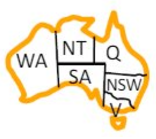

The graph can be colored using a fixed number of colors.

Here *each node* is a *variable* and the values are the colors that can be assigned to them.

Given that the domain will be the same for all our nodes we use a custom dict defined by the UniversalDict class.

The `UniversalDict Class` takes in a parameter and returns it as a value for all the keys of the dict.

It does not support item assignment.

A `universal dict` maps any key to the same value. 

We use it here as the domains dict for CSPs in which all variables have the same domain.

In [5]:
from src.utils import UniversalDict

In [6]:
d = UniversalDict(list('RGB'))

In [7]:
d['SA']

['R', 'G', 'B']

In [8]:
print(d)

Any from ['R', 'G', 'B']


In [9]:
australiaColors=UniversalDict(list('RGB'))

In [10]:
print(australiaColors['SA'],australiaColors['NT'])

['R', 'G', 'B'] ['R', 'G', 'B']


**!!!** remember: Our CSP Class includes the constraint parameter which should be a function f(A, a, B, b)

So, we need to define a constraint function *f(A, a, B, b)*.

In this case , we need to ensure that **the neighbors don't have the same color**

This is defined in the function `different_values_constraint` of the module `Utils.py`

In [11]:
from src.utils import different_values_constraint
help(different_values_constraint)

Help on function different_values_constraint in module src.utils:

different_values_constraint(A, a, B, b)
    A constraint saying two neighboring variables must differ in value.



The `CSP class` takes `neighbors` in the form of a *Dictionary*.

`{'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}`

A simple helper function `parse_neighbors `allows us to take input in the form of strings and return a Dict of a form that is compatible with the CSP Class.

In [12]:
from src.utils import parse_neighbors
help(parse_neighbors)

Help on function parse_neighbors in module src.utils:

parse_neighbors(neighbors)
    Convert a string of the form 'X: Y Z; Y: Z' into a dict mapping
    regions to neighbors. The syntax is a region name followed by a ':'
    followed by zero or more region names, followed by ';', repeated for
    each region name. If you say 'X: Y' you don't need 'Y: X'.
    >>> parse_neighbors('X: Y Z; Y: Z') == {'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}
    True



In [13]:
australia="SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: "

In [14]:
parse_neighbors(australia)

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

The `MapColoringCSP` function creates and returns a CSP with the above constraint function and states.

In [15]:
from src.CSPS import MapColoringCSP
help(MapColoringCSP)

Help on function MapColoringCSP in module src.CSPS:

MapColoringCSP(colors, neighbors)
    Make a CSP for the problem of coloring a map with different colors
    for any two adjacent regions. Arguments are a list of colors, and a
    dict of {region: [neighbor,...]} entries. This dict may also be
    specified as a string of the form defined by parse_neighbors.



In [16]:
australiaCSP = MapColoringCSP(list('RGB'), australia)

In [17]:
australiaCSP.variables

['SA', 'WA', 'NT', 'Q', 'NSW', 'V']

In [18]:
australiaCSP.domains

Any from ['R', 'G', 'B']

In [19]:
australiaCSP.neighbors

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

## AC-3 in constraint satisfaction

Algorithms that solve CSPs have a choice between searching and or doing a **constraint propagation**, a specific type of inference.

The constraints can be used to reduce the number of legal values for another variable, which in turn can reduce the legal values for some other variable, and so on. 

*Constraint propagation* tries to enforce *local consistency*. Consider each variable as a node in a graph and each binary constraint as an arc.

Enforcing local consistency causes inconsistent values to be eliminated throughout the graph

So, let's try to find inconsistent values for our Australia map Example

In [20]:
from queue import Queue
q = Queue()

for Xi in australiaCSP.variables:
  for Xk in australiaCSP.neighbors[Xi]:
    q.put((Xi, Xk))
    

(Xi, Xj) = q.get()
print((Xi, Xj))

for x in australiaCSP.domains[Xi]:
  for y in australiaCSP.domains[Xj]:
    if not australiaCSP.constraints(Xi, x, Xj, y):
      print(f'{x} value for var. {Xi} conflicts with {y} value for var. {Xj} ')

('SA', 'WA')
R value for var. SA conflicts with R value for var. WA 
G value for var. SA conflicts with G value for var. WA 
B value for var. SA conflicts with B value for var. WA 


**AC-3** is an algorithm that enforces *arc consistency*. 

After applying AC-3, either every arc is arc-consistent, or some variable has an empty domain, indicating that the CSP cannot be solved.

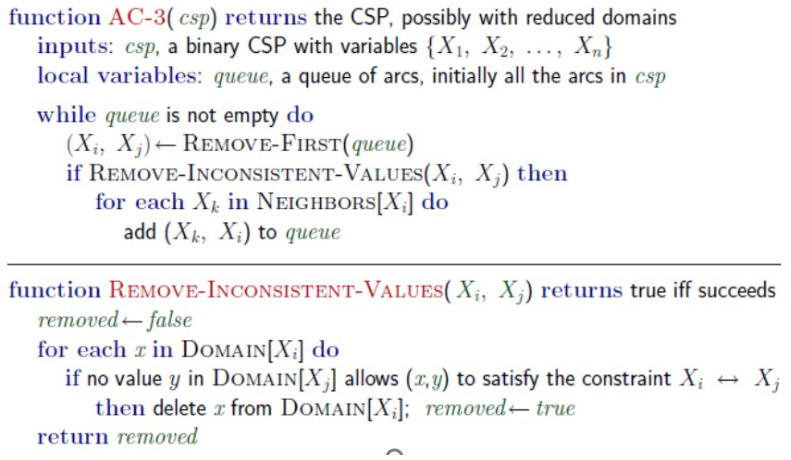

Let's see how AC3 can be used.

In [21]:
neighbors = parse_neighbors('A: B; B: ')
domains = {'A': [3,4,5,6,7], 'B': [1, 2, 3, 4,5]}
constraints = lambda X, x, Y, y: x==y

In [22]:
neighbors

defaultdict(list, {'A': ['B'], 'B': ['A']})

In [28]:
simpleCSP=CSPBasic(variables=None,neighbors=neighbors, domains=domains, constraints=constraints)

In [29]:
simpleCSP.domains

{'A': [3, 4, 5, 6, 7], 'B': [1, 2, 3, 4, 5]}

In [30]:
from src.algorithms import AC3

In [31]:
AC3(simpleCSP)

Initial queue:
('A', 'B') 
('B', 'A') 
Arc ('A', 'B') is cheking
The val 6 was deleted from A domain
The val 7 was deleted from A domain
Queue: [('B', 'A')]
Arc ('B', 'A') is cheking
The val 1 was deleted from B domain
The val 2 was deleted from B domain
Queue: []


(True, 34)

In [32]:
simpleCSP.curr_domains['A']

[3, 4, 5]

In [33]:
simpleCSP.curr_domains['B']

[3, 4, 5]

Let's try the example with 3 variables

In [34]:
neighbors1 = parse_neighbors('X: Y; Y: Z')
domains1 = {'X': [4,5,6,7], 'Y': [4,5,6,8,9], 'Z':[3,5,6,7,9]}
constraints1 = lambda X, x, Y, y: x==y

In [35]:
simpleCSP1=CSPBasic(variables=None,neighbors=neighbors1, domains=domains1, constraints=constraints1)

In [36]:
simpleCSP1.domains

{'X': [4, 5, 6, 7], 'Y': [4, 5, 6, 8, 9], 'Z': [3, 5, 6, 7, 9]}

In [103]:
AC3(simpleCSP1)

Initial queue:
('X', 'Y') 
('Y', 'X') ('Y', 'Z') 
('Z', 'Y') 
Arc ('X', 'Y') is cheking
Queue: [('Y', 'X'), ('Y', 'Z'), ('Z', 'Y')]
Arc ('Y', 'X') is cheking
Queue: [('Y', 'Z'), ('Z', 'Y')]
Arc ('Y', 'Z') is cheking
Queue: [('Z', 'Y')]
Arc ('Z', 'Y') is cheking
Queue: []


(True, 12)

In [38]:
for var in simpleCSP1.variables:
    print(var, simpleCSP1.curr_domains[var])

X [5, 6]
Y [5, 6]
Z [5, 6]


In [39]:
AC3(australiaCSP)

Initial queue:
('SA', 'WA') ('SA', 'NT') ('SA', 'Q') ('SA', 'NSW') ('SA', 'V') 
('WA', 'SA') ('WA', 'NT') 
('NT', 'SA') ('NT', 'WA') ('NT', 'Q') 
('Q', 'SA') ('Q', 'NT') ('Q', 'NSW') 
('NSW', 'SA') ('NSW', 'Q') ('NSW', 'V') 
('V', 'SA') ('V', 'NSW') 
Arc ('SA', 'WA') is cheking
Queue: [('SA', 'NT'), ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('WA', 'SA'), ('WA', 'NT'), ('NT', 'SA'), ('NT', 'WA'), ('NT', 'Q'), ('Q', 'SA'), ('Q', 'NT'), ('Q', 'NSW'), ('NSW', 'SA'), ('NSW', 'Q'), ('NSW', 'V'), ('V', 'SA'), ('V', 'NSW')]
Arc ('SA', 'NT') is cheking
Queue: [('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('WA', 'SA'), ('WA', 'NT'), ('NT', 'SA'), ('NT', 'WA'), ('NT', 'Q'), ('Q', 'SA'), ('Q', 'NT'), ('Q', 'NSW'), ('NSW', 'SA'), ('NSW', 'Q'), ('NSW', 'V'), ('V', 'SA'), ('V', 'NSW')]
Arc ('SA', 'Q') is cheking
Queue: [('SA', 'NSW'), ('SA', 'V'), ('WA', 'SA'), ('WA', 'NT'), ('NT', 'SA'), ('NT', 'WA'), ('NT', 'Q'), ('Q', 'SA'), ('Q', 'NT'), ('Q', 'NSW'), ('NSW', 'SA'), ('NSW', 'Q'), ('NSW', 'V'), ('V', 'S

(True, 72)

In [40]:
for var in australiaCSP.variables:
    print(var, australiaCSP.curr_domains[var])

SA ['R', 'G', 'B']
WA ['R', 'G', 'B']
NT ['R', 'G', 'B']
Q ['R', 'G', 'B']
NSW ['R', 'G', 'B']
V ['R', 'G', 'B']


## Simple Sudoku Example

Let's imagine that wee need to resolve the following simple sudoku:

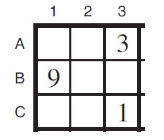

First, wee need to create cells

In [104]:
var1=list("ABC")
var2=range(1,4)

vars=set()

for letter in var1:
    for number in var2:
      vars.add(letter+str(number))

vars

{'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'}

Now wee need to describe all possible neighbours as a dictionary.

First, let's create the dictionary with cell as variables

In [105]:
sudokuNeighbors={}

for letter in var1:
    for number in var2:
      sudokuNeighbors[letter+str(number)]=[]

sudokuNeighbors

{'A1': [],
 'A2': [],
 'A3': [],
 'B1': [],
 'B2': [],
 'B3': [],
 'C1': [],
 'C2': [],
 'C3': []}

Now, based on Simple Sudoku rules we can fill the dictionary:

In [106]:
for key1 in sudokuNeighbors.keys():
  for key2 in sudokuNeighbors.keys():
    if key1!=key2:
      sudokuNeighbors[key1].append(key2)

sudokuNeighbors

{'A1': ['A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'A2': ['A1', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'A3': ['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'B1': ['A1', 'A2', 'A3', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'B2': ['A1', 'A2', 'A3', 'B1', 'B3', 'C1', 'C2', 'C3'],
 'B3': ['A1', 'A2', 'A3', 'B1', 'B2', 'C1', 'C2', 'C3'],
 'C1': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C2', 'C3'],
 'C2': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C3'],
 'C3': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2']}

Our Simple Sudoku example has some cells filled, so their domains include the specified value only

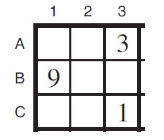


In [43]:
filled={'A3':3, 'B1':9,'C3':1}

In [74]:
sudokuDomains={var:[filled[var]] if var in filled else [ch for ch in range(1,10)] for var in sudokuNeighbors.keys()}
sudokuDomains

{'A1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A3': [3],
 'B1': [9],
 'B2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B3': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C3': [1]}

let's transform Simple Sudoku rules into constraints:

In [107]:
sudokuConstraints1 = lambda X, x, Y, y: x!=y

And resolve it with AC-3:

In [108]:
basicSudokuCSP=CSPBasic(variables=sudokuNeighbors.keys(),neighbors=sudokuNeighbors, domains=sudokuDomains, constraints=sudokuConstraints1)

In [109]:
AC3(basicSudokuCSP)

Initial queue:
('A1', 'A2') ('A1', 'A3') ('A1', 'B1') ('A1', 'B2') ('A1', 'B3') ('A1', 'C1') ('A1', 'C2') ('A1', 'C3') 
('A2', 'A1') ('A2', 'A3') ('A2', 'B1') ('A2', 'B2') ('A2', 'B3') ('A2', 'C1') ('A2', 'C2') ('A2', 'C3') 
('A3', 'A1') ('A3', 'A2') ('A3', 'B1') ('A3', 'B2') ('A3', 'B3') ('A3', 'C1') ('A3', 'C2') ('A3', 'C3') 
('B1', 'A1') ('B1', 'A2') ('B1', 'A3') ('B1', 'B2') ('B1', 'B3') ('B1', 'C1') ('B1', 'C2') ('B1', 'C3') 
('B2', 'A1') ('B2', 'A2') ('B2', 'A3') ('B2', 'B1') ('B2', 'B3') ('B2', 'C1') ('B2', 'C2') ('B2', 'C3') 
('B3', 'A1') ('B3', 'A2') ('B3', 'A3') ('B3', 'B1') ('B3', 'B2') ('B3', 'C1') ('B3', 'C2') ('B3', 'C3') 
('C1', 'A1') ('C1', 'A2') ('C1', 'A3') ('C1', 'B1') ('C1', 'B2') ('C1', 'B3') ('C1', 'C2') ('C1', 'C3') 
('C2', 'A1') ('C2', 'A2') ('C2', 'A3') ('C2', 'B1') ('C2', 'B2') ('C2', 'B3') ('C2', 'C1') ('C2', 'C3') 
('C3', 'A1') ('C3', 'A2') ('C3', 'A3') ('C3', 'B1') ('C3', 'B2') ('C3', 'B3') ('C3', 'C1') ('C3', 'C2') 
Arc ('A1', 'A2') is cheking
Queue: [('A1

(True, 1094)

In [48]:
for var in basicSudokuCSP.variables:
    print(var, basicSudokuCSP.curr_domains[var])

A1 [1, 2, 3, 4, 5, 6, 7, 8, 9]
A2 [1, 2, 3, 4, 5, 6, 7, 8, 9]
A3 [3]
B1 [9]
B2 [1, 2, 3, 4, 5, 6, 7, 8, 9]
B3 [1, 2, 3, 4, 5, 6, 7, 8, 9]
C1 [1, 2, 3, 4, 5, 6, 7, 8, 9]
C2 [1, 2, 3, 4, 5, 6, 7, 8, 9]
C3 [1]


## Tasks

In [61]:
sudokuConstraints1 = lambda X, x, Y, y: x!=y

### Task 1 - 12 points - Exams schedule

Imagine that you need to create an exam schedule for the following courses:
1. Algorithms I
2. Introduction to File and Database Management
3. Practical Programming Methodology
4. Computer Organization and Architecture I
5. Linear Algebra I
6. Introduction to Applied Statistics I
7. Operating Systems

*Hint*: in the constraint satisfaction graph each node represents a course


Each course is associated with an initial domain of possible exam days:
1. Algorithms I *{Mon, Tue, Wed}*
2. Introduction to File and Database Management *{Tue}*
3. Practical Programming Methodology *{Mon, Tue, Wed}*
4. Computer Organization and Architecture I *{Mon, Tue, Wed}*
5. Linear Algebra I *{Mon, Tue, Wed}*
6. Introduction to Applied Statistics I *{Wed}*
7. Operating Systems *{Mon, Tue, Wed}*

Main restriction: 2 courses must have exams on different days.

1. Develop CSP implementation for this problem (based on CSP class) - *5 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for Practical Programming Methodology, Computer Organization and Architecture I, Linear Algebra I  - *5 points*
3. Create 2 visualizaions: for the original CSP and after applying CA-3 -*2 points*

### Task 2 - 13 points - Asterisk Sudoku

Asterisk Sudoku is a variant of the classic Sudoku, a number placement puzzle traditionally presented in a 9x9 grid, subdivided into 3x3 subgrids or "regions." (aka "house")

The grid partially fills with numbers, referred to as "givens." - the start state of the puzzle.

The objective is to populate the empty cells in such a way that each number 1 through 9 appears exactly once in each row, column, and region.

In the Asterisk Sudoku variant, an additional constraint is introduced with a specially shaded area, an "asterisk," which must also contain the numbers 1 through 9 without repetition.

An example of an Asterisk grid in its initial state (left) and solution (right).

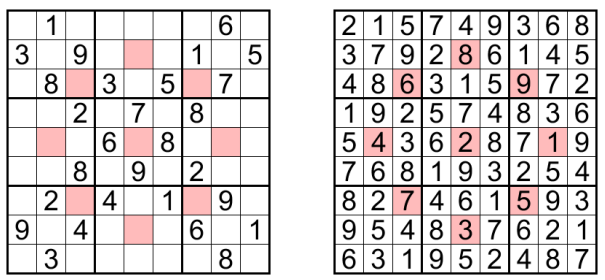

A puzzle is solved if:Every space on the board is given one value between 1 and 9 inclusive.

Tasks:
1. Develop CSP implementation for Asterisk Sudoku problem (based on CSP class) - *15 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for all cells - *5 points*
3. Create 2 visualizaions: for the original CSP and after applying CA-3 -*3 points*

## Sudoku constraints visualization with Pyvis 

The cells of the Sudoku board are treated as nodes, and the constraints of the game—rows, columns, and 3x3 subgrids—are represented by edges connecting these nodes. 

In [77]:
nodes=basicSudokuCSP.variables
nodes

dict_keys(['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'])

In [50]:
from pyvis.network import Network

In [80]:
net_sudoku = Network( heading="Lab6. Simple Sudoku constraints",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%"
) # do this


In [81]:
nodeColors={
    "empty":"white",
    "filled": "yellow"
}

In [78]:
basicSudokuCSP.domains

{'A1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A3': [3],
 'B1': [9],
 'B2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B3': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C3': [1]}

In [79]:
nodeColorsList=[]
nodeTitles=[]

for node in nodes:
    if len(basicSudokuCSP.domains[node])==1:
        nodeColorsList.append(nodeColors["filled"])
        nodeTitles.append(str(basicSudokuCSP.domains[node][0]))
    else:
        nodeColorsList.append(nodeColors["empty"])
        nodeTitles.append("")

nodeColorsList

['white',
 'white',
 'yellow',
 'yellow',
 'white',
 'white',
 'white',
 'white',
 'yellow']

In [82]:
nodeTitles

['', '', '3', '9', '', '', '', '', '1']

In [83]:
sizes=[10]*len(nodes)
sizes

[10, 10, 10, 10, 10, 10, 10, 10, 10]

In [84]:
nodes=list(nodes)
nodes

['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']

In [85]:
x_coords = []
y_coords = []

for node in nodes:
    if node[0].lower()=="a":
        y_coords.append(50)
    elif node[0].lower()=="b":
        y_coords.append(100)
    elif node[0].lower()=="c":
        y_coords.append(150)
    x_coords.append(int(node[1])*50)
    
x_coords,y_coords

([50, 100, 150, 50, 100, 150, 50, 100, 150],
 [50, 50, 50, 100, 100, 100, 150, 150, 150])

In [86]:
#hidden labels, and hover titles
net_sudoku.add_nodes(list(nodes), color=nodeColorsList,  size=sizes, title=nodeTitles,x=x_coords, y=y_coords)

In [87]:
net_sudoku.nodes

[{'color': 'white',
  'size': 10,
  'title': '',
  'x': 50,
  'y': 50,
  'id': 'A1',
  'label': 'A1',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '',
  'x': 100,
  'y': 50,
  'id': 'A2',
  'label': 'A2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'yellow',
  'size': 10,
  'title': '3',
  'x': 150,
  'y': 50,
  'id': 'A3',
  'label': 'A3',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'yellow',
  'size': 10,
  'title': '9',
  'x': 50,
  'y': 100,
  'id': 'B1',
  'label': 'B1',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '',
  'x': 100,
  'y': 100,
  'id': 'B2',
  'label': 'B2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '',
  'x': 150,
  'y': 100,
  'id': 'B3',
  'label': 'B3',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '',
  'x': 50,
  'y': 150,
  'id': 'C1

In [88]:
basicSudokuCSP.neighbors

{'A1': ['A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'A2': ['A1', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'A3': ['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'B1': ['A1', 'A2', 'A3', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'B2': ['A1', 'A2', 'A3', 'B1', 'B3', 'C1', 'C2', 'C3'],
 'B3': ['A1', 'A2', 'A3', 'B1', 'B2', 'C1', 'C2', 'C3'],
 'C1': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C2', 'C3'],
 'C2': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C3'],
 'C3': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2']}

In [89]:
for nodeFrom in basicSudokuCSP.neighbors.keys():
    for nodeTo in basicSudokuCSP.neighbors[nodeFrom]:
        if nodeFrom[0]==nodeTo[0]: # row const-s
            net_sudoku.add_edge(nodeFrom,nodeTo, color="red")
        elif nodeFrom[1]==nodeTo[1]: # col const-s
            net_sudoku.add_edge(nodeFrom,nodeTo, color="blue")
        else:
            net_sudoku.add_edge(nodeFrom,nodeTo, color="green") # diag con-s
            

In [90]:
net_sudoku.edges

[{'color': 'red', 'from': 'A1', 'to': 'A2'},
 {'color': 'red', 'from': 'A1', 'to': 'A3'},
 {'color': 'blue', 'from': 'A1', 'to': 'B1'},
 {'color': 'green', 'from': 'A1', 'to': 'B2'},
 {'color': 'green', 'from': 'A1', 'to': 'B3'},
 {'color': 'blue', 'from': 'A1', 'to': 'C1'},
 {'color': 'green', 'from': 'A1', 'to': 'C2'},
 {'color': 'green', 'from': 'A1', 'to': 'C3'},
 {'color': 'red', 'from': 'A2', 'to': 'A3'},
 {'color': 'green', 'from': 'A2', 'to': 'B1'},
 {'color': 'blue', 'from': 'A2', 'to': 'B2'},
 {'color': 'green', 'from': 'A2', 'to': 'B3'},
 {'color': 'green', 'from': 'A2', 'to': 'C1'},
 {'color': 'blue', 'from': 'A2', 'to': 'C2'},
 {'color': 'green', 'from': 'A2', 'to': 'C3'},
 {'color': 'green', 'from': 'A3', 'to': 'B1'},
 {'color': 'green', 'from': 'A3', 'to': 'B2'},
 {'color': 'blue', 'from': 'A3', 'to': 'B3'},
 {'color': 'green', 'from': 'A3', 'to': 'C1'},
 {'color': 'green', 'from': 'A3', 'to': 'C2'},
 {'color': 'blue', 'from': 'A3', 'to': 'C3'},
 {'color': 'red', 'from':

In [91]:
# Enable dynamic edges for separate curved arrows.
#net_maze.set_edge_smooth('dynamic')
net_sudoku.toggle_physics(False)
net_sudoku.show("sudoku1.html", notebook=False)

sudoku1.html


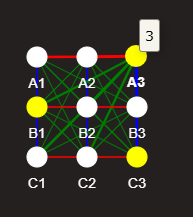

In [110]:
for var in basicSudokuCSP.variables:
    print(var, basicSudokuCSP.curr_domains[var])

A1 [2, 4, 5, 6, 7, 8]
A2 [2, 4, 5, 6, 7, 8]
A3 [3]
B1 [9]
B2 [2, 4, 5, 6, 7, 8]
B3 [2, 4, 5, 6, 7, 8]
C1 [2, 4, 5, 6, 7, 8]
C2 [2, 4, 5, 6, 7, 8]
C3 [1]


In [111]:
net_sudoku_AC3 = Network( heading="Lab6. Simple Sudoku aftre AC-3",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%"
) # do this

In [112]:
nodes=list(basicSudokuCSP.variables)
nodes

['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']

In [113]:
nodeColorsList=[]
nodeTitles=[]

for node in nodes:
    if len(basicSudokuCSP.domains[node])==1:
        nodeColorsList.append(nodeColors["filled"])
        nodeTitles.append(str(basicSudokuCSP.curr_domains[node][0]))
    else:
        nodeColorsList.append(nodeColors["empty"])
        string_list = [str(i) for i in basicSudokuCSP.curr_domains[node]]  # Convert each integer to a string
        nodeTitles.append( ",".join(string_list)  )

nodeColorsList

['white',
 'white',
 'yellow',
 'yellow',
 'white',
 'white',
 'white',
 'white',
 'yellow']

In [114]:
nodeTitles

['2,4,5,6,7,8',
 '2,4,5,6,7,8',
 '3',
 '9',
 '2,4,5,6,7,8',
 '2,4,5,6,7,8',
 '2,4,5,6,7,8',
 '2,4,5,6,7,8',
 '1']

In [115]:
net_sudoku_AC3.add_nodes(nodes, color=nodeColorsList,  size=sizes, title=nodeTitles, x=x_coords, y=y_coords)

In [116]:
net_sudoku_AC3.nodes

[{'color': 'white',
  'size': 10,
  'title': '2,4,5,6,7,8',
  'x': 50,
  'y': 50,
  'id': 'A1',
  'label': 'A1',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '2,4,5,6,7,8',
  'x': 100,
  'y': 50,
  'id': 'A2',
  'label': 'A2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'yellow',
  'size': 10,
  'title': '3',
  'x': 150,
  'y': 50,
  'id': 'A3',
  'label': 'A3',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'yellow',
  'size': 10,
  'title': '9',
  'x': 50,
  'y': 100,
  'id': 'B1',
  'label': 'B1',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '2,4,5,6,7,8',
  'x': 100,
  'y': 100,
  'id': 'B2',
  'label': 'B2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'title': '2,4,5,6,7,8',
  'x': 150,
  'y': 100,
  'id': 'B3',
  'label': 'B3',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'size': 10,
  'ti

In [117]:
for nodeFrom in basicSudokuCSP.neighbors.keys():
    for nodeTo in basicSudokuCSP.neighbors[nodeFrom]:
        if nodeFrom[0]==nodeTo[0]: # row const-s
            net_sudoku_AC3.add_edge(nodeFrom,nodeTo, color="red")
        elif nodeFrom[1]==nodeTo[1]: # col const-s
            net_sudoku_AC3.add_edge(nodeFrom,nodeTo, color="blue")
        else:
            net_sudoku_AC3.add_edge(nodeFrom,nodeTo, color="green") # diag con-s

In [118]:
net_sudoku_AC3.toggle_physics(False)
net_sudoku_AC3.show("sudoku1_AC3.html", notebook=False)

sudoku1_AC3.html


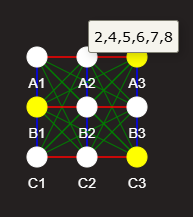